In [13]:
import matplotlib.pyplot as plt
import sympy as sp
from sympy import sin, cos, exp, ln
import numpy as np
from random import random
from IPython.display import display, Latex

In [34]:
def g(x):
    return 5*sin(x) + 2 * cos(x)

In [51]:
n = 70
m = 7
epsilon = 5/n ** 0.5

In [46]:
X = np.array([2 + 10 * i/n for i in range(n)])
Y1 = np.array([g(xi) for xi in X])
Y2 = np.array([g(xi) + (random() - 0.5) * 2 * epsilon for xi in X])

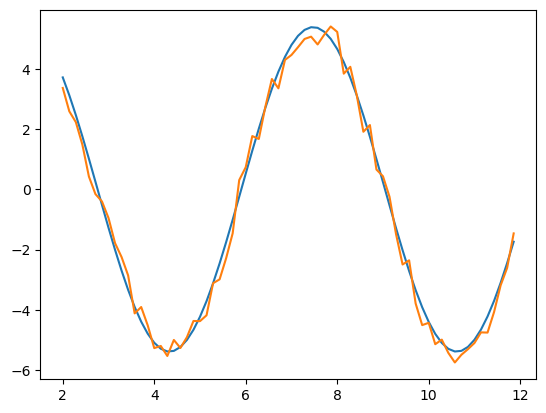

In [47]:
fig, ax = plt.subplots()
ax.plot(X, Y1)
ax.plot(X, Y2)
plt.show()

In [20]:
f

Matrix([[1, x, x**2, x**3]])

In [55]:
x = sp.symbols("x")
f = sp.Matrix([x**i for i in range(m)]).T
A = sp.Matrix([[sum(f[i].subs({x:xk}) * f[j].subs({x:xk}) for xk in X) for j in range(m)] for i in range(m)])
b = sp.Matrix([sum(f[i].subs({x:xk}) * yk for xk, yk in zip(X, Y2)) for i in range(m)])
a = sp.Matrix([sp.symbols("a_" + str(i)) for i in range(m)])

In [56]:
res = sp.solve(A*a - b, a)
final_function = (f * a.subs(res))[0]
final_function

-0.00257887005566801*x**6 + 0.116289589776368*x**5 - 2.03072807047575*x**4 + 17.271581149707*x**3 - 73.7912973768341*x**2 + 146.494153407062*x - 104.636477394626

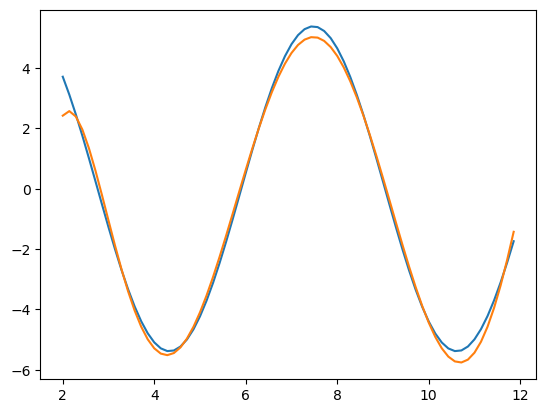

In [57]:
fig, ax = plt.subplots()
ax.plot(X, Y1)
ax.plot(X, [final_function.subs({x:xk}) for xk in X])
plt.show()

In [58]:
n = 100
m = 4
epsilon = 1 /n

In [62]:
x = sp.symbols("x")
f = sp.Matrix([1, sin(x), cos(x), ln(x)]).T
A = sp.Matrix([[sum(f[i].subs({x:xk}) * f[j].subs({x:xk}) for xk in X) for j in range(m)] for i in range(m)])
b = sp.Matrix([sum(f[i].subs({x:xk}) * yk for xk, yk in zip(X, Y1)) for i in range(m)])
a = sp.Matrix([sp.symbols("a_" + str(i)) for i in range(m)])

In [63]:
res = sp.solve(A*a - b, a)
final_function = (f * a.subs(res))[0]
final_function

1.0990662612736e-14*log(x) + 5.00000000000002*sin(x) + 2.0*cos(x) - 1.89287246438595e-14

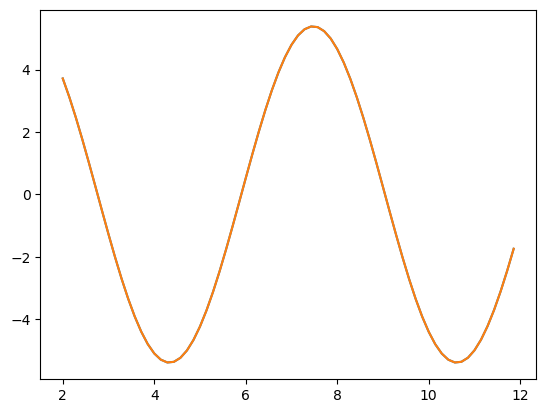

In [64]:
fig, ax = plt.subplots()
ax.plot(X, Y1)
ax.plot(X, [final_function.subs({x:xk}) for xk in X])
plt.show()